In [11]:
from wordcloud import WordCloud
import pandas as pd
import string
from string import digits
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import os
import re
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
import pyLDAvis.gensim
import warnings
warnings.simplefilter('ignore')
from itertools import chain
from collections import Counter

In [12]:
folderpath = r"New Folder\Modulated Chat" # make sure to put the 'r' in front
filepaths  = [os.path.join(folderpath, name) for name in os.listdir(folderpath)]
all_files = []

for path in filepaths:
    file = pd.read_csv(path)
    all_files.append(file['Message_Only_Text'])
    
all_files

[0                   hi who has handle to our ig account
 1                               no we dont have one yet
 2                                     can we create one
 3                                                    yh
 4                                 facebook adwoa farmer
 5                                                   NaN
 6                                        yea well noted
 7     hello team you  can submit your issues and pos...
 8                                                      
 9                                                  sure
 10    httpsdocsgooglecomformsdiywxqlrbegsnlruaunxppp...
 11                              we can share this at am
 12                                                great
 Name: Message_Only_Text, dtype: object,
 0                                     good evening team
 1                                             ok thanks
 2                                               awesome
 3                                     ive sent

In [13]:
txts = []
for i in all_files:
    txt = i.values.tolist()
    txts.append(txt)
txts[0][0]

'hi who has handle to our ig account'

In [14]:
texts = []
for i in txts:
    text = ' '.join([str(elem) for elem in i])
    texts.append(text)
    
texts[1]

'good evening team ok thanks awesome ive sent the mail adwoa im sending yours okay ok derek you didnt send the sample certificate just  the data lemme send asap thanks sorry sure psd file right'

In [15]:
long_string = ""
for i in texts:
    long_string = long_string + i
long_string

'hi who has handle to our ig account no we dont have one yet can we create one yh facebook adwoa farmer nan yea well noted hello team you  can submit your issues and possible solutions here    sure httpsdocsgooglecomformsdiywxqlrbegsnlruaunxpppphcvsushtjfeomc we can share this at am greatgood evening team ok thanks awesome ive sent the mail adwoa im sending yours okay ok derek you didnt send the sample certificate just  the data lemme send asap thanks sorry sure psd file rightgood morning everyone hope we good sent some couple of certificates out already and im glad about the feedbacks its great people expect a lot from notitia so jerry and adwoa i hope youre working on yours too im fine thanks good morning me too by grace chaley great thats great oh wow we are going to release flyers for the speakers for the webinar from today i finished before sleeping good to know sure yeah awesome will be done before the close of the day too great  can we compile the list of emails and send them a 

In [16]:
k = 0
for i in texts:
    res = i.strip()
    #print(res)
    texts[k] = res
    k = k + 1
    
texts[0]

'hi who has handle to our ig account no we dont have one yet can we create one yh facebook adwoa farmer nan yea well noted hello team you  can submit your issues and possible solutions here    sure httpsdocsgooglecomformsdiywxqlrbegsnlruaunxpppphcvsushtjfeomc we can share this at am great'

In [17]:
k = 0
for i in texts:
    tagged_sentence = nltk.tag.pos_tag(i.split())
    edited_sentence = [word for word,tag in tagged_sentence if tag != 'NNP' and tag != 'NNPS']
    texts[k] = ' '.join(edited_sentence)
    k = k + 1
texts[0]

'hi who has handle to our ig account no we dont have one yet can we create one yh facebook adwoa farmer nan yea well noted hello team you can submit your issues and possible solutions here sure httpsdocsgooglecomformsdiywxqlrbegsnlruaunxpppphcvsushtjfeomc we can share this at am great'

In [18]:
comm_words = ['good', 'morning', 'derek', 'have', 'here', 'so', 'and', 'to', 'make', 'ill', 'lets', 'soon', 'couldnt', 'put', 'guys', 'th', 'deleted', 'message', 'afternoon', 'evening', 'im', 'hello', 'yea', 'yet', 'happy', 'dont', 'I', 'we', 'you', 'sure', 'great', 'use', 'please', 'well', 'will', 'nan', 'yes', 'one', 'hi', 'ok', 'thanks', 'thank', 'awesome', 'hii', 'didnt', 'okay', 'ok', 'send', 'sent', 'ive', 'asap', 'gonna', 'now', 'alright', 'cant']
stop_words = set(stopwords.words('english')) 
k = 0
for i in texts:
    querywords = i.split()
    resultwords  = [word for word in querywords if word.lower() not in comm_words]
    resultwords1  = [word for word in resultwords if word.lower() not in stop_words]
    result = ' '.join(resultwords1)
    texts[k] = result
    k += 1
texts[0]

'handle ig account create yh facebook adwoa farmer noted team submit issues possible solutions httpsdocsgooglecomformsdiywxqlrbegsnlruaunxpppphcvsushtjfeomc share'

In [19]:
tokens = []
for i in texts:
    token = word_tokenize(i)
    tokens.append(token)
tokens[0]

['handle',
 'ig',
 'account',
 'create',
 'yh',
 'facebook',
 'adwoa',
 'farmer',
 'noted',
 'team',
 'submit',
 'issues',
 'possible',
 'solutions',
 'httpsdocsgooglecomformsdiywxqlrbegsnlruaunxpppphcvsushtjfeomc',
 'share']

In [20]:
stop_words = set(stopwords.words('english'))
k = 0
for j in tokens:
    result = [i for i in j if not i in stop_words]
    tokens[k] = result
    k = k + 1
tokens[9]

['team',
 'organize',
 'better',
 'publicly',
 'available',
 'hope',
 'ready',
 'starting',
 'minutes',
 'yep',
 'background',
 'noises',
 'lot',
 'oh',
 'lightsout',
 'oww',
 'unmute',
 'guyss',
 'everything',
 'went',
 'really',
 'doe',
 'everyone',
 'exhausted']

In [21]:
Cnt = []
for i in tokens:
    Cnt.append(Counter(i))

In [22]:
Cnt[0]

Counter({'handle': 1,
         'ig': 1,
         'account': 1,
         'create': 1,
         'yh': 1,
         'facebook': 1,
         'adwoa': 1,
         'farmer': 1,
         'noted': 1,
         'team': 1,
         'submit': 1,
         'issues': 1,
         'possible': 1,
         'solutions': 1,
         'httpsdocsgooglecomformsdiywxqlrbegsnlruaunxpppphcvsushtjfeomc': 1,
         'share': 1})

In [23]:
Occ = []
for i in Cnt:
    most_occur = i.most_common(10)   
    Occ.append(most_occur)
Occ

[[('handle', 1),
  ('ig', 1),
  ('account', 1),
  ('create', 1),
  ('yh', 1),
  ('facebook', 1),
  ('adwoa', 1),
  ('farmer', 1),
  ('noted', 1),
  ('team', 1)],
 [('team', 1),
  ('mail', 1),
  ('adwoa', 1),
  ('sending', 1),
  ('sample', 1),
  ('certificate', 1),
  ('data', 1),
  ('lem', 1),
  ('sorry', 1),
  ('psd', 1)],
 [('hope', 2),
  ('everyone', 1),
  ('couple', 1),
  ('certificates', 1),
  ('already', 1),
  ('glad', 1),
  ('feedbacks', 1),
  ('people', 1),
  ('expect', 1),
  ('lot', 1)],
 [('webinar', 2),
  ('panel', 2),
  ('getting', 1),
  ('closer', 1),
  ('see', 1),
  ('momentum', 1),
  ('already', 1),
  ('proposed', 1),
  ('questions', 1),
  ('agree', 1)],
 [('webinar', 2),
  ('wow', 1),
  ('team', 1),
  ('site', 1),
  ('would', 1),
  ('available', 1),
  ('testing', 1),
  ('tomorrow', 1),
  ('add', 1),
  ('rest', 1)],
 [('site', 2),
  ('kindly', 2),
  ('logo', 2),
  ('available', 1),
  ('testing', 1),
  ('httpsnotitiasite', 1),
  ('link', 1),
  ('httpsnotitiasiteindexphpmya

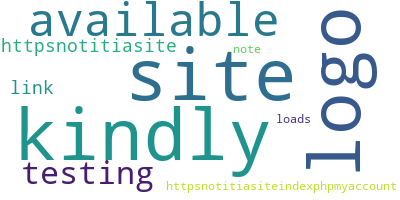

In [34]:
wordcloud = WordCloud(background_color = "white", max_words = 10,contour_width = 3, contour_color = 'steelblue')    
wordcloud.generate(texts[5])
wordcloud.to_image()

In [25]:
toks = []
for i in texts:
    tok = re.sub("[^\w]", " ",  i).split()
    toks.append(tok)
toks

[['handle',
  'ig',
  'account',
  'create',
  'yh',
  'facebook',
  'adwoa',
  'farmer',
  'noted',
  'team',
  'submit',
  'issues',
  'possible',
  'solutions',
  'httpsdocsgooglecomformsdiywxqlrbegsnlruaunxpppphcvsushtjfeomc',
  'share'],
 ['team',
  'mail',
  'adwoa',
  'sending',
  'sample',
  'certificate',
  'data',
  'lemme',
  'sorry',
  'psd',
  'file',
  'right'],
 ['everyone',
  'hope',
  'couple',
  'certificates',
  'already',
  'glad',
  'feedbacks',
  'people',
  'expect',
  'lot',
  'notitia',
  'jerry',
  'adwoa',
  'hope',
  'youre',
  'working',
  'fine',
  'grace',
  'chaley',
  'thats',
  'oh',
  'wow',
  'going',
  'release',
  'flyers',
  'speakers',
  'webinar',
  'today',
  'finished',
  'sleeping',
  'know',
  'yeah',
  'done',
  'close',
  'day',
  'compile',
  'list',
  'emails',
  'general',
  'genderneutral',
  'mail',
  'concerning',
  'upcoming',
  'event',
  'nice',
  'share'],
 ['webinar',
  'getting',
  'closer',
  'see',
  'momentum',
  'already',


In [26]:
dictionary_LDA = corpora.Dictionary(toks)
corpus = []
for i in toks:
    corp = [dictionary_LDA.doc2bow(i)]
    corpus.append(corp)
corpus

[[[(0, 1),
   (1, 1),
   (2, 1),
   (3, 1),
   (4, 1),
   (5, 1),
   (6, 1),
   (7, 1),
   (8, 1),
   (9, 1),
   (10, 1),
   (11, 1),
   (12, 1),
   (13, 1),
   (14, 1),
   (15, 1)]],
 [[(1, 1),
   (14, 1),
   (16, 1),
   (17, 1),
   (18, 1),
   (19, 1),
   (20, 1),
   (21, 1),
   (22, 1),
   (23, 1),
   (24, 1),
   (25, 1)]],
 [[(1, 1),
   (11, 1),
   (20, 1),
   (26, 1),
   (27, 1),
   (28, 1),
   (29, 1),
   (30, 1),
   (31, 1),
   (32, 1),
   (33, 1),
   (34, 1),
   (35, 1),
   (36, 1),
   (37, 1),
   (38, 1),
   (39, 1),
   (40, 1),
   (41, 1),
   (42, 1),
   (43, 1),
   (44, 1),
   (45, 1),
   (46, 1),
   (47, 1),
   (48, 2),
   (49, 1),
   (50, 1),
   (51, 1),
   (52, 1),
   (53, 1),
   (54, 1),
   (55, 1),
   (56, 1),
   (57, 1),
   (58, 1),
   (59, 1),
   (60, 1),
   (61, 1),
   (62, 1),
   (63, 1),
   (64, 1),
   (65, 1),
   (66, 1),
   (67, 1)]],
 [[(26, 1),
   (63, 2),
   (68, 1),
   (69, 1),
   (70, 1),
   (71, 1),
   (72, 1),
   (73, 1),
   (74, 2),
   (75, 1),
   (76, 1)

In [27]:
print(dictionary_LDA.num_nnz)

1501


In [28]:
lda = gensim.models.ldamodel.LdaModel

In [29]:
num_topics = 5
crp = corpus[3]
ldamodel = lda(crp, num_topics = num_topics, id2word = dictionary_LDA, passes = 50, minimum_probability = 0.07)

In [30]:
ldamodel.print_topics(num_topics)

[(0,
  '0.012*"webinar" + 0.012*"panel" + 0.007*"closer" + 0.007*"agree" + 0.007*"questions" + 0.007*"proposed" + 0.007*"moderate" + 0.007*"getting" + 0.007*"discussion" + 0.007*"see"'),
 (1,
  '0.001*"proposed" + 0.001*"momentum" + 0.001*"already" + 0.001*"agree" + 0.001*"questions" + 0.001*"moderate" + 0.001*"getting" + 0.001*"discussion" + 0.001*"closer" + 0.001*"see"'),
 (2,
  '0.001*"closer" + 0.001*"already" + 0.001*"proposed" + 0.001*"agree" + 0.001*"questions" + 0.001*"moderate" + 0.001*"getting" + 0.001*"discussion" + 0.001*"see" + 0.001*"momentum"'),
 (3,
  '0.001*"proposed" + 0.001*"getting" + 0.001*"closer" + 0.001*"momentum" + 0.001*"agree" + 0.001*"questions" + 0.001*"moderate" + 0.001*"discussion" + 0.001*"see" + 0.001*"already"'),
 (4,
  '0.001*"momentum" + 0.001*"already" + 0.001*"proposed" + 0.001*"getting" + 0.001*"agree" + 0.001*"questions" + 0.001*"moderate" + 0.001*"discussion" + 0.001*"closer" + 0.001*"see"')]

In [31]:
lda_display = pyLDAvis.gensim.prepare(ldamodel, crp, dictionary_LDA, sort_topics = False, mds='mmds')

pyLDAvis.display(lda_display)